In [1]:
from __future__ import division, print_function, with_statement
import numpy as np
import matplotlib as mpl
mpl.use('Agg')
%matplotlib inline
import matplotlib.pyplot as plt
from os.path import basename, splitext, exists
import cv2
import sys

import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.preprocessing.image import ImageDataGenerator
from keras.utils import to_categorical
from glob import glob
python_major_version = sys.version_info[0]

#np.random.seed(20170918) # fix seed

num_classes = 3
img_rows, img_cols = 120, 160
input_shape = (img_rows, img_cols,3)

C:\Users\user01\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


For each class,
- Separate fixed number (= n_valid) of sample as validation samples
- The rest is all training sample. Repeat them until training sample number is roughly n_train

Repeat above and average accuracy.

In [2]:
n_valid = 10
n_train = 300
x_train=[]; y_train=[];
x_valid=[]; y_valid=[];

files = glob('../AI/FAS_SRC_USW/dat/ds20180808/0.8mm/B/*.jpg')
y=0
idx_valid = np.random.choice(len(files), n_valid)
idx_train = np.array([i for i in np.arange(len(files)) if not i in idx_valid])
idx_train = np.tile(idx_train, round(n_train/len(idx_train)))
#print(idx_valid)
#print(idx_train)
print(len(idx_train))
for i, idx in enumerate(idx_train):
    img = cv2.resize(cv2.imread(files[idx]), None, fx=0.25, fy=0.25, interpolation = cv2.INTER_CUBIC)
    x_train.append(img.reshape(input_shape))
    y_train.append(y)
for i, idx in enumerate(idx_valid):
    x_valid.append(cv2.resize(cv2.imread(files[idx]), None, fx=0.25, fy=0.25, interpolation = cv2.INTER_CUBIC)
                   .reshape(input_shape))
    y_valid.append(y)

files = glob('../AI/FAS_SRC_USW/dat/ds20180808/0.8mm/N/*.jpg')
y=1
idx_valid = np.random.choice(len(files), n_valid)
idx_train = np.array([i for i in np.arange(len(files)) if not i in idx_valid])
idx_train = np.tile(idx_train, round(n_train/len(idx_train)))
#print(idx_valid)
#print(idx_train)
print(len(idx_train))
for i, idx in enumerate(idx_train):
    x_train.append(cv2.resize(cv2.imread(files[idx]), None, fx=0.25, fy=0.25, interpolation = cv2.INTER_CUBIC)
                   .reshape(input_shape))
    y_train.append(y)
for i, idx in enumerate(idx_valid):
    x_valid.append(cv2.resize(cv2.imread(files[idx]), None, fx=0.25, fy=0.25, interpolation = cv2.INTER_CUBIC)
                   .reshape(input_shape))
    y_valid.append(y)

files = glob('../AI/FAS_SRC_USW/dat/ds20180808/0.8mm/ok/*.jpg')
y=2
idx_valid = np.random.choice(len(files), n_valid)
idx_train = np.array([i for i in np.arange(len(files)) if not i in idx_valid])
idx_train = np.tile(idx_train, round(n_train/len(idx_train)))
#print(idx_valid)
#print(idx_train)
print(len(idx_train))
for i, idx in enumerate(idx_train):
    x_train.append(cv2.resize(cv2.imread(files[idx]), None, fx=0.25, fy=0.25, interpolation = cv2.INTER_CUBIC)
                   .reshape(input_shape))
    y_train.append(y)
for i, idx in enumerate(idx_valid):
    x_valid.append(cv2.resize(cv2.imread(files[idx]), None, fx=0.25, fy=0.25, interpolation = cv2.INTER_CUBIC)
                   .reshape(input_shape))
    y_valid.append(y)


x_train = np.array(x_train).astype('float32')/255
x_valid = np.array(x_valid).astype('float32')/255
y_train = np.array(y_train)
y_valid = np.array(y_valid)

print('x_train shape: ', x_train.shape)
print("x_train size: ", sys.getsizeof(x_train))

312
348
316
x_train shape:  (976, 120, 160, 3)
x_train size:  224870544


In [3]:
def _model():
    model = Sequential()
    model.add(Conv2D(8, kernel_size=(3, 3),
                     activation='relu',
                     input_shape=input_shape))
    model.add(Conv2D(16, kernel_size=(3, 3),
                     activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Conv2D(32, kernel_size=(3, 3),
                     activation='relu',
                     input_shape=input_shape))
    model.add(Conv2D(64, kernel_size=(3, 3),
                     activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Flatten())
    model.add(Dense(64, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(num_classes, activation='softmax'))

    model.compile(loss=keras.losses.categorical_crossentropy,
                  optimizer=keras.optimizers.adadelta(),
                  metrics=['accuracy'])
    return model

In [4]:
def plot_history(history, n_split):
    h = history.history
    loss     = h['loss']
    val_loss = h['val_loss']
    acc     = h['acc']
    val_acc = h['val_acc']
    N = len(loss)
    fig, ax1=plt.subplots()
    ax1.plot(range(1,N+1), loss, marker='.', label='loss', color='blue')
    ax1.plot(range(1,N+1), val_loss, marker='.', label='val_loss', color='g')
    ax2=ax1.twinx()
    ax2.plot(range(1,N+1),     acc, marker='.', label='acc', color='black')
    ax2.plot(range(1,N+1), val_acc, marker='.', label='val_acc', color='r')

    plt.grid()
    ax1.set_xlabel('epoch')
    ax1.set_ylabel('loss')
    ax2.set_ylabel('accuracy')
    ax2.set_ylim(0, 1.02)
    ax1.legend(loc='center right', fontsize=12)
    ax2.legend(loc='center',fontsize=12)
    plt.savefig(str(n_split)+'_ep.png', dpi=120)
    plt.show()

In [5]:
datagen = ImageDataGenerator(
    featurewise_center=False,
    featurewise_std_normalization=False,
    rotation_range=0.5,
    width_shift_range=0.05,
    height_shift_range=0.05,
    horizontal_flip=False)

#clr = KerasClassifier(build_fn=model, epochs=1024, batch_size=256, verbose=0)

In [6]:
batch_size = 32

cv_scores = []
#print('split: ', 0)
datagen.fit(x_train)
model = _model()
h = model.fit_generator(datagen.flow(x_train, 
                                     to_categorical(y_train, num_classes),
                                     batch_size = batch_size),
    validation_data = (x_valid,
                        to_categorical(y_valid, num_classes)),
                steps_per_epoch=len(x_train) / batch_size,
                epochs=150,
                verbose=1)

Epoch 1/150
31/30 [==============================] - 6s 177ms/step - loss: 1.1777 - acc: 0.4497 - val_loss: 0.6771 - val_acc: 0.6667
Epoch 2/150
31/30 [==============================] - 3s 100ms/step - loss: 0.7667 - acc: 0.5967 - val_loss: 0.4779 - val_acc: 0.6667
Epoch 3/150
31/30 [==============================] - 3s 105ms/step - loss: 0.6281 - acc: 0.6169 - val_loss: 0.4580 - val_acc: 0.8000
Epoch 4/150
31/30 [==============================] - 3s 113ms/step - loss: 0.5877 - acc: 0.6643 - val_loss: 0.4623 - val_acc: 0.8333
Epoch 5/150
31/30 [==============================] - 3s 106ms/step - loss: 0.5507 - acc: 0.6664 - val_loss: 0.4299 - val_acc: 0.8333
Epoch 6/150
31/30 [==============================] - 4s 116ms/step - loss: 0.4994 - acc: 0.6846 - val_loss: 0.4302 - val_acc: 0.8000
Epoch 7/150
31/30 [==============================] - 4s 121ms/step - loss: 0.5270 - acc: 0.6865 - val_loss: 0.4401 - val_acc: 0.7000
Epoch 8/150
31/30 [==============================] - 3s 107ms/step - 

31/30 [==============================] - 3s 111ms/step - loss: 0.2389 - acc: 0.8891 - val_loss: 0.2479 - val_acc: 0.8667
Epoch 63/150
31/30 [==============================] - 3s 106ms/step - loss: 0.2587 - acc: 0.8800 - val_loss: 0.2767 - val_acc: 0.8333
Epoch 64/150
31/30 [==============================] - 3s 105ms/step - loss: 0.2422 - acc: 0.8871 - val_loss: 0.2469 - val_acc: 0.9000
Epoch 65/150
31/30 [==============================] - 3s 105ms/step - loss: 0.2375 - acc: 0.8972 - val_loss: 0.2431 - val_acc: 0.8667
Epoch 66/150
31/30 [==============================] - 3s 112ms/step - loss: 0.2277 - acc: 0.9042 - val_loss: 0.3112 - val_acc: 0.8333
Epoch 67/150
31/30 [==============================] - 3s 107ms/step - loss: 0.2429 - acc: 0.8881 - val_loss: 0.2685 - val_acc: 0.8667
Epoch 68/150
31/30 [==============================] - 3s 112ms/step - loss: 0.2544 - acc: 0.8821 - val_loss: 0.3194 - val_acc: 0.7667
Epoch 69/150
31/30 [==============================] - 3s 110ms/step - loss:

31/30 [==============================] - 3s 109ms/step - loss: 0.1402 - acc: 0.9506 - val_loss: 0.4481 - val_acc: 0.8333
Epoch 124/150
31/30 [==============================] - 3s 106ms/step - loss: 0.1759 - acc: 0.9335 - val_loss: 0.3308 - val_acc: 0.8667
Epoch 125/150
31/30 [==============================] - 3s 106ms/step - loss: 0.1248 - acc: 0.9405 - val_loss: 0.2524 - val_acc: 0.9000
Epoch 126/150
31/30 [==============================] - 3s 111ms/step - loss: 0.1455 - acc: 0.9465 - val_loss: 0.4274 - val_acc: 0.8667
Epoch 127/150
31/30 [==============================] - 3s 106ms/step - loss: 0.1477 - acc: 0.9455 - val_loss: 0.2757 - val_acc: 0.8667
Epoch 128/150
31/30 [==============================] - 3s 105ms/step - loss: 0.1508 - acc: 0.9355 - val_loss: 0.4656 - val_acc: 0.8667
Epoch 129/150
31/30 [==============================] - 3s 107ms/step - loss: 0.1534 - acc: 0.9395 - val_loss: 0.2516 - val_acc: 0.8667
Epoch 130/150
31/30 [==============================] - 3s 105ms/step 

0.9666666388511658


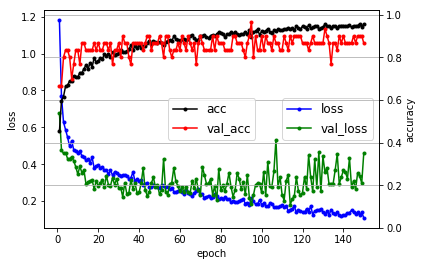

In [7]:
print(max(h.history['val_acc']))
plot_history(h, 0)

### Result

1st iteration: 